<ipython-input-3-219071ecbd52>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Random Forest - MAE: 1.778181267730499
Random Forest - MSE: 9.081545047466461
Linear Regression - MAE: 1.360304456464807
Linear Regression - MSE: 5.251233046487531


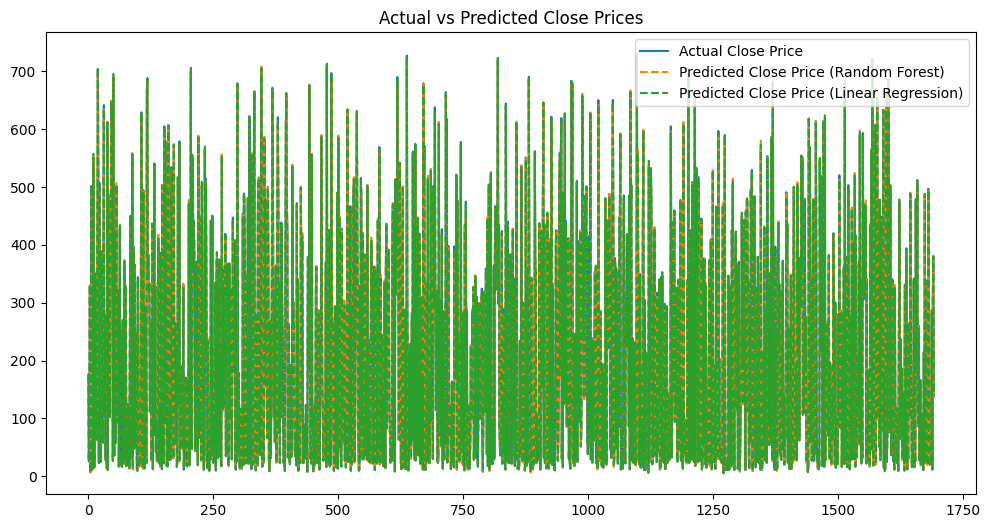

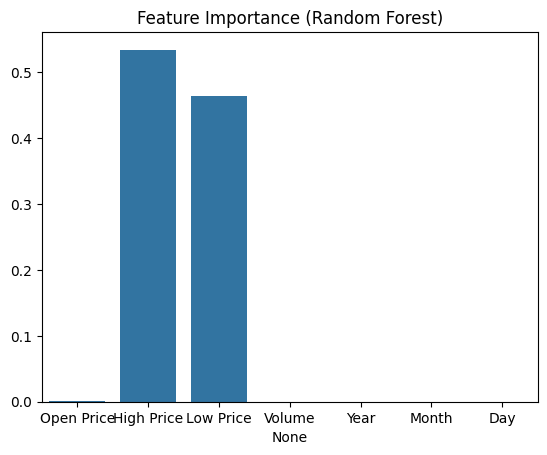

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

url = 'NFLX_stock_price.csv'
df = pd.read_csv(url)

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.fillna(method='ffill', inplace=True)

X = df[['Open Price', 'High Price', 'Low Price', 'Volume', 'Year', 'Month', 'Day']]
y = df['Close Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Prediction: Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test_scaled)
print(f"Random Forest - MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Random Forest - MSE: {mean_squared_error(y_test, y_pred_rf)}")

# 2. Prediction: Linear Regression Model (for comparison)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_lr = lr_model.predict(X_test_scaled)
print(f"Linear Regression - MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"Linear Regression - MSE: {mean_squared_error(y_test, y_pred_lr)}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price')
plt.plot(y_pred_rf, label='Predicted Close Price (Random Forest)', linestyle='--')
plt.plot(y_pred_lr, label='Predicted Close Price (Linear Regression)', linestyle='--')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()

feature_importances = rf_model.feature_importances_
features = X.columns
sns.barplot(x=features, y=feature_importances)
plt.title('Feature Importance (Random Forest)')
plt.show()

